In [1]:
#acessar google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#importação das biblicates de apoio
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import datetime

Output hidden; open in https://colab.research.google.com to view.

In [0]:


#carregar dados de treino
emendas = pd.read_csv("/content/drive/My Drive/Colab Notebooks/emendas_parlamentares_2.csv", delimiter = ',', encoding='utf-8', decimal='.')


In [0]:
emendas[".liquidado"] = [x.replace(",", ".") for x in emendas[".liquidado"]]
emendas['.liquidado'] = emendas['.liquidado'].astype(float)
emendas['.empenho'] = emendas['.empenho'].astype(float)

In [5]:
emendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 25 columns):
.despesa_autorizada                4184 non-null int64
.empenho                           4184 non-null float64
.liquidado                         4184 non-null float64
.total                             4184 non-null int64
.valor_medio_destinado             4184 non-null int64
% de empenho                       2390 non-null float64
ano                                4184 non-null int64
atuacao                            4184 non-null object
Média de Autorizado x Empenhado    2390 non-null float64
Categoria Econômica                4184 non-null object
classe                             4184 non-null object
Elemento de Despesa                4184 non-null object
Fonte de Recurso                   4184 non-null object
Função                             4184 non-null object
Gestão                             4184 non-null object
Grupo de Natureza da Despesa       4184 non-null obje

In [0]:

emendas['.empenho'].fillna(value=emendas['.empenho'].median(), inplace=True)
emendas['.despesa_autorizada'].fillna(value=emendas['.despesa_autorizada'].median(), inplace=True)
emendas['Média de Autorizado x Empenhado'].fillna(value=emendas['Média de Autorizado x Empenhado'].median(), inplace=True)
emendas['Média de Autorizado x Empenhado'].fillna(value=emendas['Média de Autorizado x Empenhado'].median(), inplace=True)





In [0]:

emendas["execucao"]= emendas[".empenho"].div(other = emendas['.despesa_autorizada'], fill_value = 0) 



In [8]:
emendas.describe()

,.despesa_autorizada,.empenho,.liquidado,.total,.valor_medio_destinado,% de empenho,ano,Média de Autorizado x Empenhado,execucao
count,4.184000e+03,4.184000e+03,4.184000e+03,4184.000000,4.184000e+03,2390.000000,4184.000000,4184.000000,3145.00
mean,4.167068e+05,1.337942e+05,1.198772e+05,1.000239,4.164351e+05,0.109315,2017.570507,0.062443,inf
std,1.091213e+06,6.203780e+05,5.256487e+05,0.015460,1.090892e+06,0.559723,1.148042,0.426443,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,2016.000000,0.000000,0.00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,2017.000000,0.000000,0.00
50%,1.000000e+05,0.000000e+00,0.000000e+00,1.000000,1.000000e+05,0.000000,2018.000000,0.000000,0.00
75%,4.000000e+05,4.452250e+02,0.000000e+00,1.000000,4.000000e+05,0.000000,2019.000000,0.000000,1.05
max,1.911194e+07,2.000000e+07,1.096382e+07,2.000000,1.911194e+07,20.004767,2019.000000,20.004767,inf


In [9]:
emendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 26 columns):
.despesa_autorizada                4184 non-null int64
.empenho                           4184 non-null float64
.liquidado                         4184 non-null float64
.total                             4184 non-null int64
.valor_medio_destinado             4184 non-null int64
% de empenho                       2390 non-null float64
ano                                4184 non-null int64
atuacao                            4184 non-null object
Média de Autorizado x Empenhado    4184 non-null float64
Categoria Econômica                4184 non-null object
classe                             4184 non-null object
Elemento de Despesa                4184 non-null object
Fonte de Recurso                   4184 non-null object
Função                             4184 non-null object
Gestão                             4184 non-null object
Grupo de Natureza da Despesa       4184 non-null obje

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



ValueError: ignored

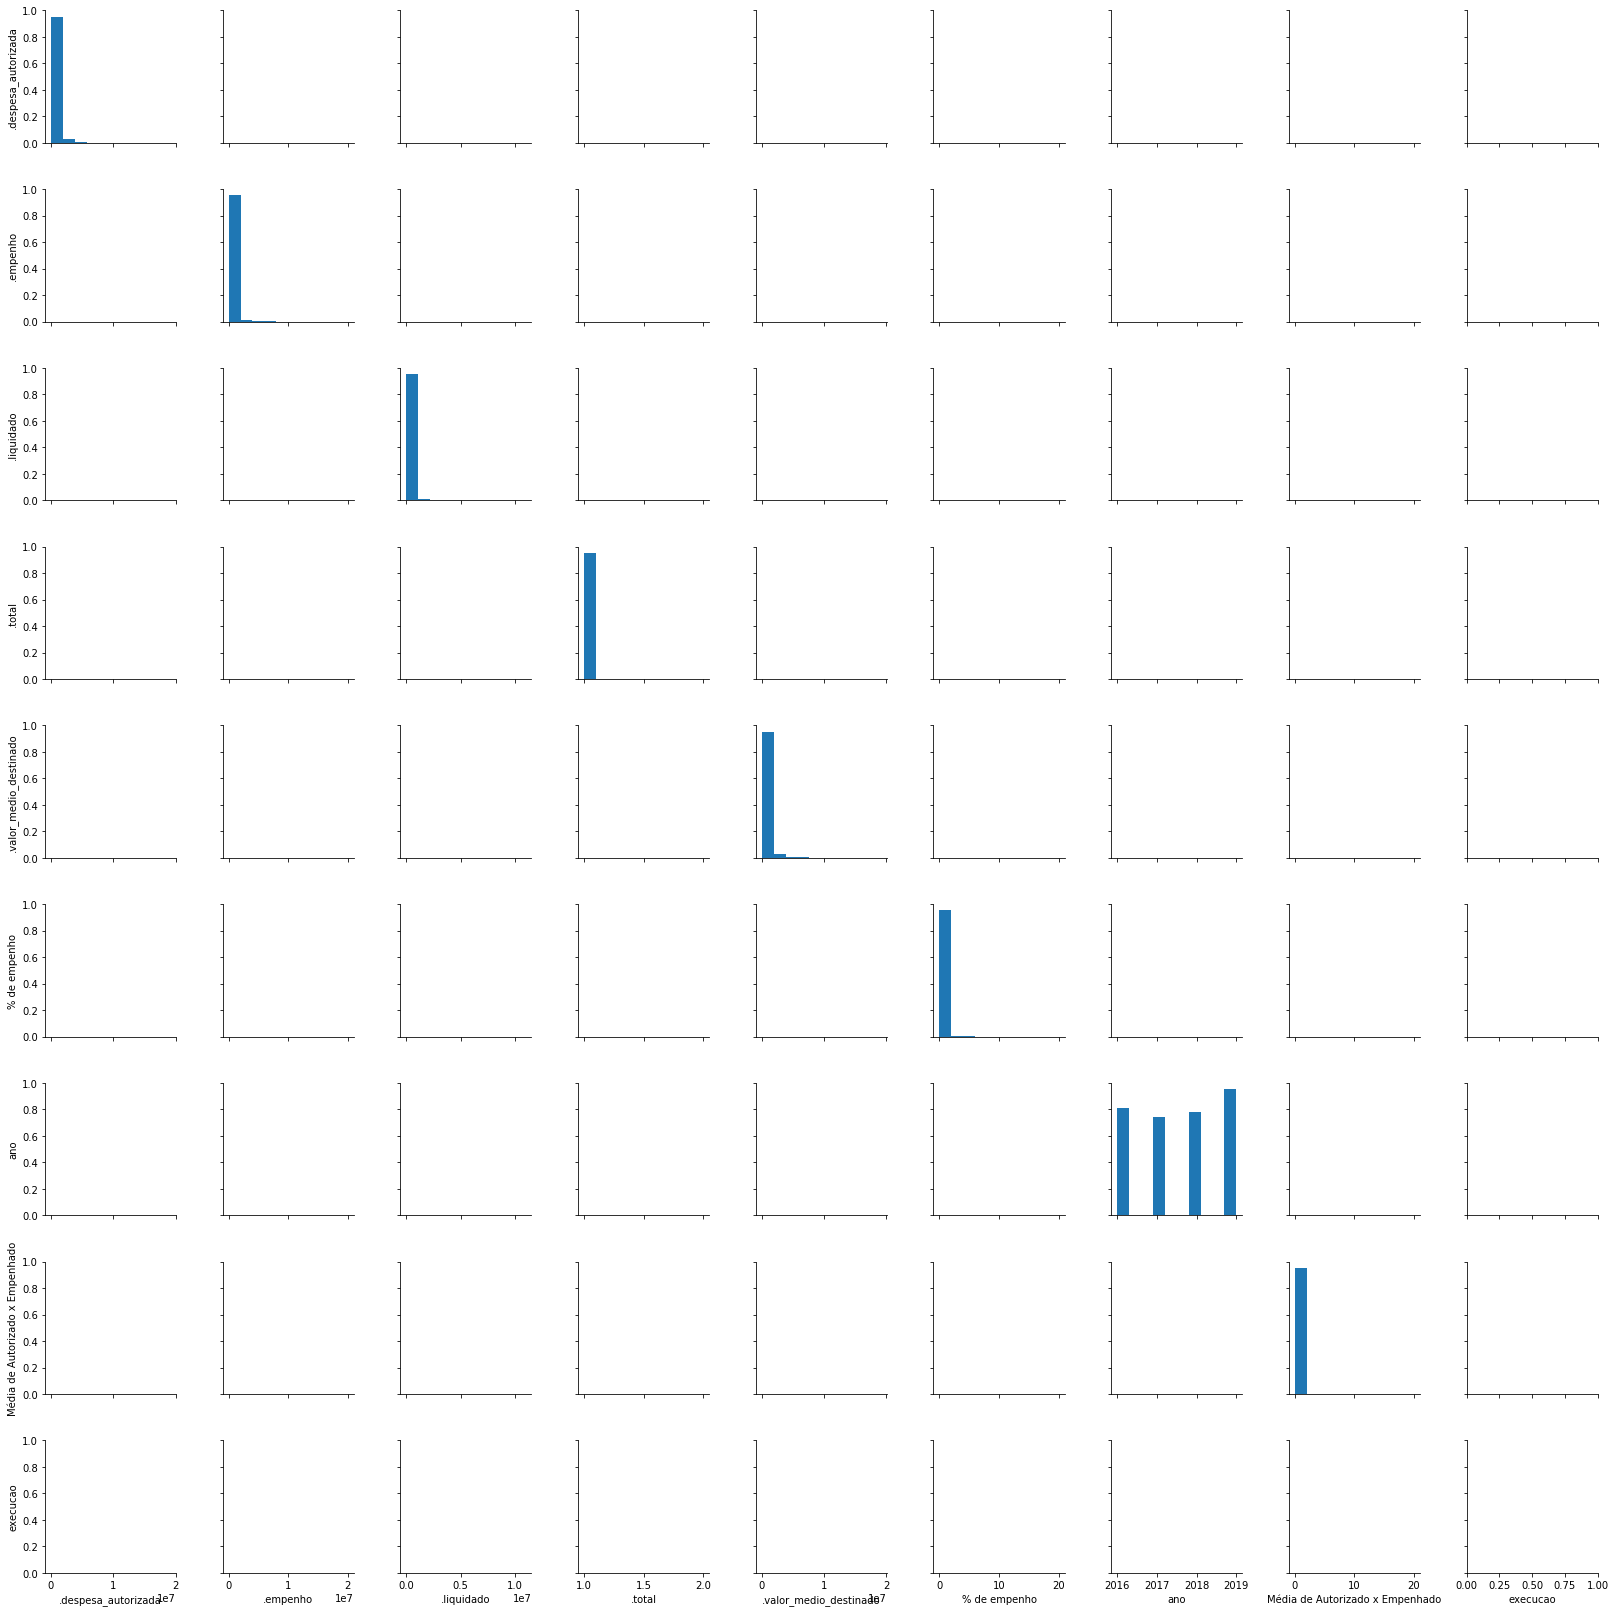

In [10]:
##exploração de dados
sns.pairplot(emendas)

In [11]:
emendas['.empenho'].mean()

133794.15535611854

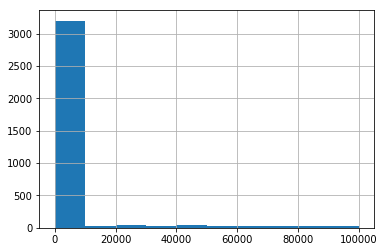

In [12]:
emendas[emendas['.empenho']<100000]['.empenho'].hist()

In [13]:
emendas['Pago'].hist()

KeyError: ignored

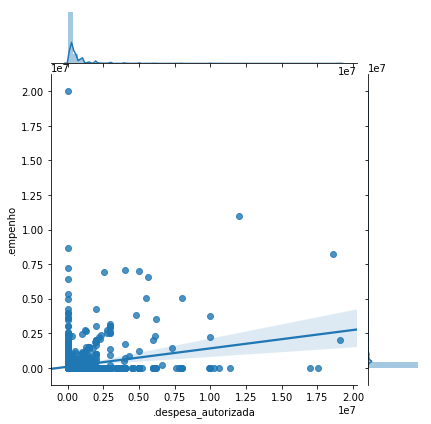

In [14]:

sns.jointplot(x='.despesa_autorizada', y='.empenho', data=emendas, kind='reg')




In [0]:
crr = emendas.corr()

Text(0.5, 1.0, 'Correlação de Variáveis')

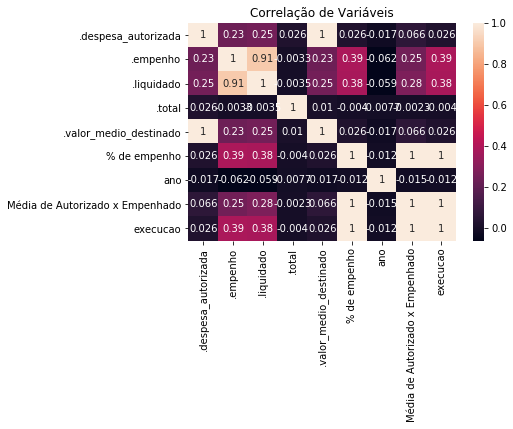

In [16]:
sns.heatmap(crr, annot=True)
plt.title('Correlação de Variáveis')

In [0]:
x = emendas[['.empenho']]
y = emendas['.despesa_autorizada']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
X_train, X_test, y_tran, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [0]:
lm = LinearRegression()

In [36]:
lm.fit(X_train, y_tran)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(lm.intercept_)

369180.98479910893


In [38]:
print(lm.coef_)

[0.38645345]


In [0]:
coefs = pd.DataFrame(lm.coef_, x.columns, columns=['coefs'])

In [40]:
coefs

,coefs
.empenho,0.386453


In [0]:
predict = lm.predict(X_test)

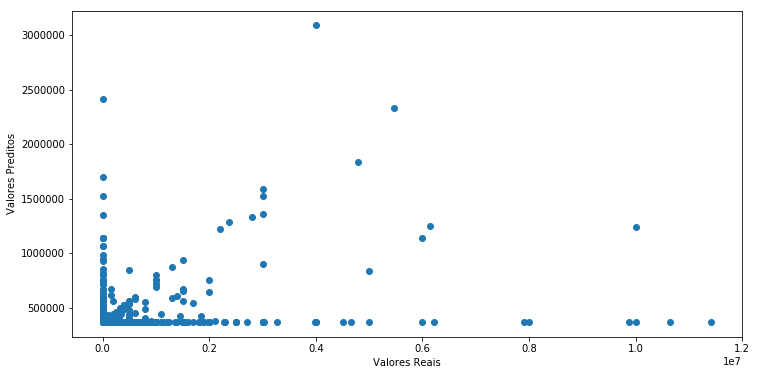

In [42]:
#aderencia entre o predito e treino, eixo x é o valor efetivo de votos e eixo Y o resultado dos testes
plt.figure(figsize=(12,6))
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.scatter(y_test, predict)

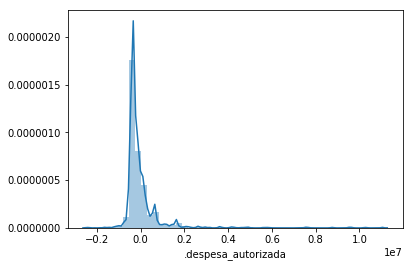

In [43]:
#distribuição normal do votos, o modelo tem um grande desvio padrão
sns.distplot((y_test-predict))

In [0]:
from sklearn import metrics

In [45]:
##média de erro do modelo na predição de votos, quanto o modelo erra, ele erra em 1191 votos.
print('MAE', metrics.mean_absolute_error(y_test, predict))

MAE 467936.0603562417


In [46]:
##média de erro do modelo na predição de votos, quanto o modelo erra, ele erra em 1191 votos.
print('MSE', metrics.mean_squared_error(y_test, predict))

MSE 930760335740.6841


In [0]:
import numpy as np
import pandas as pd
import sys
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [0]:
X = emendas[[
    '.empenho',
    '.despesa_autorizada'
]]
kmeans = KMeans(
    n_clusters = 5, # testar diferentes valores
    n_init = 15, 
    max_iter = 450, 
    init = 'k-means++'
)
kmeans.fit(X)
emendas
emendas['cluster'] = kmeans.labels_ # adiciona coluna c/ cluster
grouped = emendas.groupby('cluster')
stacked = pd.DataFrame()
for group in grouped:
    means = group[1].mean(axis = 0)
    
    stacked[group[0]] = means
print(stacked)

                                            0  ...             4
.despesa_autorizada              1.416949e+05  ...  1.774365e+06
.empenho                         7.794265e+04  ...  4.563193e+06
.liquidado                       7.026386e+04  ...  3.977391e+06
.total                           1.000000e+00  ...  1.000000e+00
.valor_medio_destinado           1.416949e+05  ...  1.774365e+06
% de empenho                     9.869573e-02  ...  1.359203e+00
ano                              2.017573e+03  ...  2.017250e+03
Média de Autorizado x Empenhado  4.981497e-02  ...  7.928683e-01
execucao                                  inf  ...           inf
cluster                          0.000000e+00  ...  4.000000e+00

[10 rows x 5 columns]


In [0]:
emendas['cluster'].value_counts()

0    3592
3     478
1      63
4      36
2      15
Name: cluster, dtype: int64

In [0]:
cluster0 = emendas[emendas['cluster']==4]

In [0]:
cluster0['% de empenho'].mean()

1.3592028678686414

In [0]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print('silhueta media:', silhouette_avg)


silhueta media: 0.7077450443964971


In [0]:
X = emendas[[
    
    
    '.despesa_autorizada',

    'ano'
   
]]

y = emendas['classe']



In [0]:
from sklearn.preprocessing import StandardScaler


In [0]:
X_train, X_test, y_tran, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [0]:
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()


In [0]:
classificador.fit(X_train, y_tran)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
previsores = classificador.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
precisao = accuracy_score(y_test, previsores)

In [0]:
precisao

0.7372611464968153

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classificador)
print(precisao)

print(classification_report(y_test, previsores))

GaussianNB(priors=None, var_smoothing=1e-09)
0.7372611464968153
              precision    recall  f1-score   support

        Alta       0.32      0.02      0.04       307
       Baixa       0.74      0.98      0.85       934
       Media       0.00      0.00      0.00        15

    accuracy                           0.74      1256
   macro avg       0.35      0.34      0.30      1256
weighted avg       0.63      0.74      0.64      1256



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

